In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [5]:
# Load in csv
wind_reports_string = 'wind_reports.csv'
wind_reports_df = pd.read_csv(wind_reports_string)

wind_reports_df




,Observation Time,Wind Speed (knots),Wind Speed (mph),Wind Speed (m/s),Latitude,Longitude,Affected County
0,1990-07-01 18:01:00,55,63.29,28.29,34.4000,-77.6800,Pender County NC
1,1990-07-01 19:15:00,63,72.50,32.41,35.2000,-75.7000,Dare County NC
2,1990-08-20 15:13:00,58,66.75,29.84,35.2300,-80.8500,Mecklenburg County NC
3,1990-08-25 13:21:00,61,70.20,31.38,35.1200,-77.0500,Craven County NC
4,1990-08-29 17:45:00,52,59.84,26.75,36.3000,-76.2300,Pasquotank County NC
...,...,...,...,...,...,...,...
10991,2019-10-31 18:28:00,50,57.54,25.72,36.3300,-78.5900,Granville County NC
10992,2019-10-31 18:39:00,50,57.54,25.72,36.1166,-78.6142,Granville County NC
10993,2019-10-31 18:49:00,50,57.54,25.72,35.6984,-78.6937,Wake County NC
10994,2019-10-31 19:00:00,50,57.54,25.72,35.1888,-79.1301,Moore County NC


In [6]:
# Group data by year

print(wind_reports_df["Observation Time"].unique())

wind_reports_groupby_year = wind_reports_df.groupby("Observation Time")

['1990-07-01 18:01:00' '1990-07-01 19:15:00' '1990-08-20 15:13:00' ...
 '2019-10-31 18:49:00' '2019-10-31 19:00:00' '2019-10-31 23:11:00']


In [7]:
# Split month and year in "DATE" column

year_and_month_df = wind_reports_df["Observation Time"].str.split(pat="-", expand=True)

year_and_month_df

,0,1,2
0,1990,07,01 18:01:00
1,1990,07,01 19:15:00
2,1990,08,20 15:13:00
3,1990,08,25 13:21:00
4,1990,08,29 17:45:00
...,...,...,...
10991,2019,10,31 18:28:00
10992,2019,10,31 18:39:00
10993,2019,10,31 18:49:00
10994,2019,10,31 19:00:00


In [8]:
# Rename columns as "YEAR" and "MONTH"

year_and_month_df = year_and_month_df.rename(columns= {0: "YEAR", 1: "MONTH"})

In [9]:
# Add "YEAR" column to raw_prec_df

wind_reports_df["YEAR"] = year_and_month_df["YEAR"]

wind_reports_df

,Observation Time,Wind Speed (knots),Wind Speed (mph),Wind Speed (m/s),Latitude,Longitude,Affected County,YEAR
0,1990-07-01 18:01:00,55,63.29,28.29,34.4000,-77.6800,Pender County NC,1990
1,1990-07-01 19:15:00,63,72.50,32.41,35.2000,-75.7000,Dare County NC,1990
2,1990-08-20 15:13:00,58,66.75,29.84,35.2300,-80.8500,Mecklenburg County NC,1990
3,1990-08-25 13:21:00,61,70.20,31.38,35.1200,-77.0500,Craven County NC,1990
4,1990-08-29 17:45:00,52,59.84,26.75,36.3000,-76.2300,Pasquotank County NC,1990
...,...,...,...,...,...,...,...,...
10991,2019-10-31 18:28:00,50,57.54,25.72,36.3300,-78.5900,Granville County NC,2019
10992,2019-10-31 18:39:00,50,57.54,25.72,36.1166,-78.6142,Granville County NC,2019
10993,2019-10-31 18:49:00,50,57.54,25.72,35.6984,-78.6937,Wake County NC,2019
10994,2019-10-31 19:00:00,50,57.54,25.72,35.1888,-79.1301,Moore County NC,2019


In [10]:
# Split month and year in "DATE" column
wind_reports_df['Year']= pd.DatetimeIndex(wind_reports_df['Observation Time']).year
wind_reports_df

,Observation Time,Wind Speed (knots),Wind Speed (mph),Wind Speed (m/s),Latitude,Longitude,Affected County,YEAR,Year
0,1990-07-01 18:01:00,55,63.29,28.29,34.4000,-77.6800,Pender County NC,1990,1990
1,1990-07-01 19:15:00,63,72.50,32.41,35.2000,-75.7000,Dare County NC,1990,1990
2,1990-08-20 15:13:00,58,66.75,29.84,35.2300,-80.8500,Mecklenburg County NC,1990,1990
3,1990-08-25 13:21:00,61,70.20,31.38,35.1200,-77.0500,Craven County NC,1990,1990
4,1990-08-29 17:45:00,52,59.84,26.75,36.3000,-76.2300,Pasquotank County NC,1990,1990
...,...,...,...,...,...,...,...,...,...
10991,2019-10-31 18:28:00,50,57.54,25.72,36.3300,-78.5900,Granville County NC,2019,2019
10992,2019-10-31 18:39:00,50,57.54,25.72,36.1166,-78.6142,Granville County NC,2019,2019
10993,2019-10-31 18:49:00,50,57.54,25.72,35.6984,-78.6937,Wake County NC,2019,2019
10994,2019-10-31 19:00:00,50,57.54,25.72,35.1888,-79.1301,Moore County NC,2019,2019


In [11]:
# Group data by year

print(wind_reports_df["Year"].unique())

prec_groupby_year = wind_reports_df.groupby("Year")

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


In [13]:
# Use sum method to calculate total wind speed  by year

average_annual_wind_speed = prec_groupby_year["Wind Speed (mph)"].mean()

average_annual_wind_speed

Year
1990    66.516000
1991    62.142500
1992    65.293913
1993    65.234375
1994    66.234444
1995    68.376389
1996    60.663286
1997    59.018550
1998    61.782222
1999    62.298235
2000    62.109968
2001    62.903276
2002    61.546901
2003    62.772188
2004    61.453279
2005    61.326141
2006    60.089271
2007    59.568537
2008    59.539554
2009    59.100035
2010    58.750151
2011    59.613081
2012    58.337707
2013    58.996107
2014    58.969172
2015    58.883497
2016    58.797434
2017    58.473960
2018    58.277716
2019    58.480304
Name: Wind Speed (mph), dtype: float64

In [14]:
average_wind_speed_df = pd.DataFrame({'annual wind speed': average_annual_wind_speed})
average_wind_speed_df

,annual wind speed
Year,
1990,66.516000
1991,62.142500
1992,65.293913
1993,65.234375
1994,66.234444
1995,68.376389
1996,60.663286
1997,59.018550
1998,61.782222


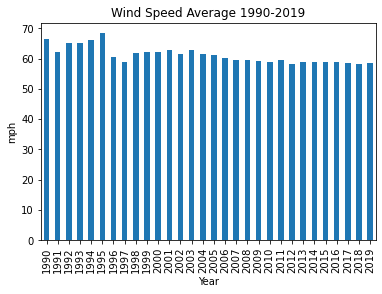

<Figure size 432x288 with 0 Axes>

In [19]:
# Create a bar chart based off of the group series from before
count_chart = average_annual_wind_speed.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Year")
count_chart.set_ylabel("mph")

plt.title('Wind Speed Average 1990-2019')

plt.show()
plt.tight_layout()